<a href="https://colab.research.google.com/github/rjnakano/manejo-inventarios-pdg/blob/main/Notebooks/TDG042321V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install --upgrade kmodes

Note: you may need to restart the kernel to use updated packages.


In [1]:
# from google.colab import drive
import pathlib
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

from kmodes.kprototypes import KPrototypes

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()

from plotnine import *
import plotnine

In [2]:
plot_kwds = {'alpha' : 0.5, 's' : 1, 'linewidths':0}

In [3]:
if str(pathlib.Path().absolute()).find('content') >= 0:
    sourcepath = 'https://raw.githubusercontent.com/rjnakano/manejo-inventarios-pdg/main/Datos/Transformed'
else:
    sourcepath = '../Datos/Transformed'
print(sourcepath)    

../Datos/Transformed


In [10]:
# Dataset de inventarios sin dimensiones de los productos
df = pd.read_csv("{}/dfNoDims.csv".format(sourcepath))
df.drop('CONTRPERC', inplace=True, axis=1)

In [11]:
data1 = df

In [12]:
data1.dtypes

AISLE         int64
IG           object
HTS          object
PLANNING     object
ABC          object
UOM          object
CAT          object
COSTX       float64
QTYVAR      float64
dtype: object

In [14]:
data1['AISLE']=data1['AISLE'].astype(str)

In [15]:
data1.dtypes

AISLE        object
IG           object
HTS          object
PLANNING     object
ABC          object
UOM          object
CAT          object
COSTX       float64
QTYVAR      float64
dtype: object

In [16]:
data1

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR
0,17,IG56,HTS119,1/1,B,PC,CAT17,-289.8802,-2.63
1,17,IG56,HTS119,1/1,B,PC,CAT17,289.5527,25.00
2,17,IG56,HTS119,1/1,C,PC,CAT17,1111.3121,50.00
3,17,IG56,HTS119,1/1,B,PC,CAT17,-266.8633,-9.09
4,15,IG56,HTS119,1/1,C,PC,CAT17,-517.0436,-11.11
...,...,...,...,...,...,...,...,...,...
16239,23,IG5,HTS67,1/0,C,BX,CAT2,316.3834,1.00
16240,21,IG5,HTS67,1/0,C,BX,CAT2,626.9100,1.00
16241,22,IG5,HTS67,1/0,C,BX,CAT2,4959.6974,136.36
16242,24,IG5,HTS67,1/0,C,BX,CAT2,-1322.5860,-100.00


In [17]:
numdf = data1[list(data1.select_dtypes('float64').columns)]
scaled_features = StandardScaler().fit_transform(numdf.values)
scaled_features_df = pd.DataFrame(scaled_features, index=numdf.index, columns=numdf.columns)
scaled_features_df

,COSTX,QTYVAR
0,-0.029671,-0.037167
1,0.092655,-0.006905
2,0.266138,0.020477
3,-0.024812,-0.044242
4,-0.077628,-0.046455
...,...,...
16239,0.098319,-0.033191
16240,0.163875,-0.033191
16241,1.078580,0.115063
16242,-0.247688,-0.143812


In [18]:
catdf = data1[list(data1.select_dtypes('object').columns)]

In [19]:
data1 = pd.concat((catdf, scaled_features_df), axis = 1)
data1

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR
0,17,IG56,HTS119,1/1,B,PC,CAT17,-0.029671,-0.037167
1,17,IG56,HTS119,1/1,B,PC,CAT17,0.092655,-0.006905
2,17,IG56,HTS119,1/1,C,PC,CAT17,0.266138,0.020477
3,17,IG56,HTS119,1/1,B,PC,CAT17,-0.024812,-0.044242
4,15,IG56,HTS119,1/1,C,PC,CAT17,-0.077628,-0.046455
...,...,...,...,...,...,...,...,...,...
16239,23,IG5,HTS67,1/0,C,BX,CAT2,0.098319,-0.033191
16240,21,IG5,HTS67,1/0,C,BX,CAT2,0.163875,-0.033191
16241,22,IG5,HTS67,1/0,C,BX,CAT2,1.078580,0.115063
16242,24,IG5,HTS67,1/0,C,BX,CAT2,-0.247688,-0.143812


In [21]:
catColumnsPos = [data1.columns.get_loc(col) for col in list(data1.select_dtypes('object').columns)]

In [22]:
# Fit the cluster 
# k = 2
# gamma = 0.5
import time
start_time = time.time()
kprototype = KPrototypes(n_jobs = -1, n_clusters = 4, init = 'Huang', gamma = 0.5, random_state = 0)
kprototype.fit_predict(data1, categorical = catColumnsPos)
print("--- %s seconds ---" % (time.time() - start_time))

--- 32.38212609291077 seconds ---


In [23]:
print(kprototype.cluster_centroids_)

[['0.002726388751717142' '-0.03595785577407407' '2' 'IG45' 'HTS119' '1/1'
  'A' 'BX' 'CAT17']
 ['-3.6487292748298596' '-0.11901373330295542' '37' 'IG64' 'HTS15' '1/1'
  'A' 'BX' 'CAT14']
 ['1.784357513065899' '36.717082988705094' '2' 'IG38' 'HTS61' '1/1' 'A'
  'SQFT' 'CAT8']
 ['2.79799290946075' '0.50533898239745' '37' 'IG64' 'HTS15' '1/1' 'A'
  'BX' 'CAT14']]


In [24]:
data1['Cluster'] = kprototype.labels_

/Users/ryumanakano/opt/anaconda3/envs/pdg/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
/Users/ryumanakano/opt/anaconda3/envs/pdg/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
/Users/ryumanakano/opt/anaconda3/envs/pdg/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

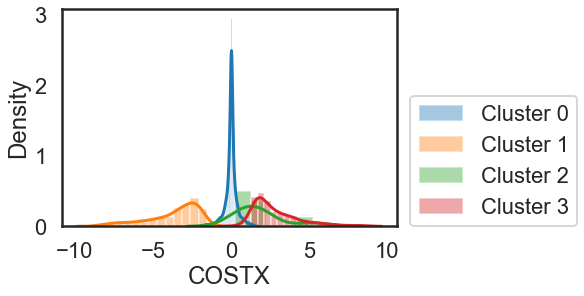

In [41]:
import matplotlib.pylab as plt
for var in ['COSTX']:
    for i in range(4):
        sns.distplot(data1.loc[data1['Cluster']==i,var], label= 'Cluster {}'.format(i));
        plt.legend(loc=(1.04,0))
    

/Users/ryumanakano/opt/anaconda3/envs/pdg/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


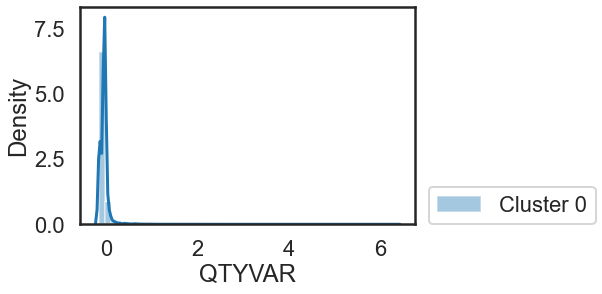

/Users/ryumanakano/opt/anaconda3/envs/pdg/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


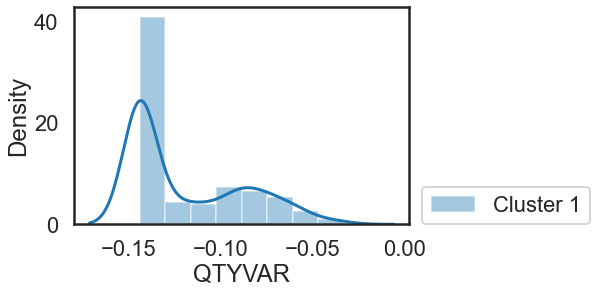

/Users/ryumanakano/opt/anaconda3/envs/pdg/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


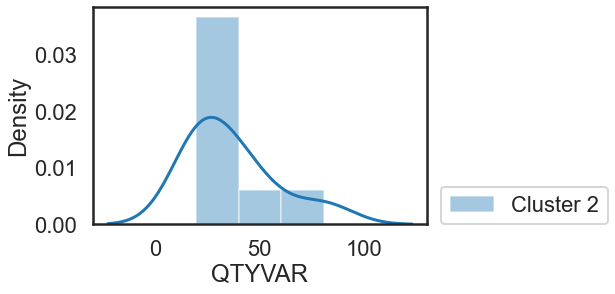

/Users/ryumanakano/opt/anaconda3/envs/pdg/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


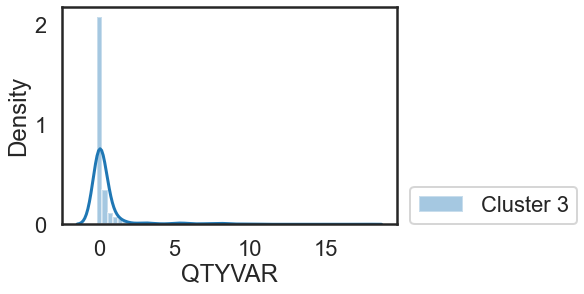

In [42]:
for i in range(4):
    sns.distplot(data1.loc[data1['Cluster']==i,'QTYVAR'], label= 'Cluster {}'.format(i));
    plt.legend(loc=(1.04,0))
    plt.show()

In [44]:
contingency = pd.crosstab(data1['Cluster'], data1['CAT']) 
contingency

CAT,CAT1,CAT10,CAT11,CAT12,CAT14,CAT15,CAT16,CAT17,CAT2,CAT3,CAT4,CAT5,CAT6,CAT7,CAT8,CAT9
Cluster,,,,,,,,,,,,,,,,
0,134,235,1,2319,1729,82,2362,3895,185,479,94,176,7,1166,2120,159
1,6,6,0,99,185,1,38,31,2,17,6,12,0,26,54,0
2,0,0,0,1,0,0,2,0,0,0,0,0,0,1,4,0
3,6,10,0,139,225,0,53,62,3,23,4,12,0,29,43,1


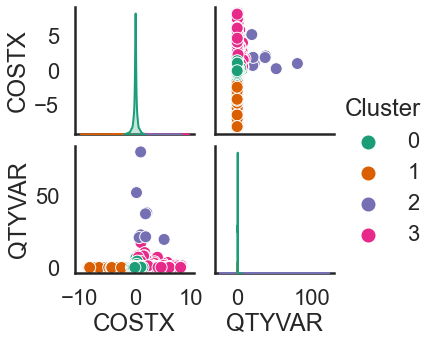

In [45]:
sns.pairplot(data1,hue='Cluster',palette='Dark2',diag_kind='kde')

In [48]:
data1[data1['Cluster']==0].describe()

,COSTX,QTYVAR,Cluster
count,15143.000000,15143.000000,15143.0
mean,0.002726,-0.035958,0.0
std,0.395524,0.197223,0.0
min,-1.932898,-0.143812,0.0
25%,-0.109056,-0.089049,0.0
50%,0.023141,-0.035831,0.0
75%,0.133249,-0.030053,0.0
max,1.583515,6.354699,0.0


In [49]:
data1[data1['Cluster']==1].describe()

,COSTX,QTYVAR,Cluster
count,483.000000,483.000000,483.0
mean,-3.648729,-0.119014,1.0
std,1.649935,0.031328,0.0
min,-8.415911,-0.143812,1.0
25%,-4.492418,-0.143812,1.0
50%,-3.130172,-0.143812,1.0
75%,-2.369654,-0.089153,1.0
max,-1.555956,-0.033191,1.0


In [50]:
data1[data1['Cluster']==2].describe()

,COSTX,QTYVAR,Cluster
count,8.000000,8.000000,8.0
mean,1.784358,36.717083,2.0
std,1.540000,21.319261,0.0
min,0.274541,19.570782,2.0
25%,0.954461,21.271650,2.0
50%,1.467688,30.139995,2.0
75%,1.976701,41.766129,2.0
max,5.242270,80.959836,2.0


In [51]:
data1[data1['Cluster']==3].describe()

,COSTX,QTYVAR,Cluster
count,610.000000,610.000000,610.0
mean,2.797993,0.505339,3.0
std,1.469469,1.572353,0.0
min,0.450163,-0.143812,3.0
25%,1.739312,-0.033191,3.0
50%,2.332558,0.036643,3.0
75%,3.526532,0.239528,3.0
max,8.414728,17.380272,3.0


In [52]:
df['Cluster'] = kprototype.labels_

In [53]:
data1[data1['Cluster']==1]

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR,Cluster
68,3,IG46,HTS119,1/1,A,PC,CAT17,-2.642266,-0.143812,1
154,17,IG46,HTS119,1/1,A,PC,CAT17,-3.341862,-0.071853,1
159,12,IG56,HTS119,1/0,C,PC,CAT17,-2.151521,-0.143812,1
162,13,IG56,HTS119,1/0,C,PC,CAT17,-5.926566,-0.143812,1
270,13,IG53,HTS119,1/0,B,BX,CAT16,-2.001607,-0.055797,1
...,...,...,...,...,...,...,...,...,...,...
16198,25,IG7,HTS95,1/1,A,BX,CAT8,-4.094174,-0.143812,1
16200,24,IG7,HTS95,1/1,A,BX,CAT8,-3.008627,-0.143812,1
16202,27,IG7,HTS95,1/1,A,BX,CAT8,-4.177917,-0.143812,1
16205,35,IG7,HTS95,1/1,A,BX,CAT8,-8.153502,-0.143812,1


In [54]:
df[df['Cluster']==1]

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR,Cluster
68,3,IG46,HTS119,1/1,A,PC,CAT17,-12665.2573,-100.00,1
154,17,IG46,HTS119,1/1,A,PC,CAT17,-15979.1115,-34.30,1
159,12,IG56,HTS119,1/0,C,PC,CAT17,-10340.6868,-100.00,1
162,13,IG56,HTS119,1/0,C,PC,CAT17,-28222.3745,-100.00,1
270,13,IG53,HTS119,1/0,B,BX,CAT16,-9630.5744,-19.64,1
...,...,...,...,...,...,...,...,...,...,...
16198,25,IG7,HTS95,1/1,A,BX,CAT8,-19542.6729,-100.00,1
16200,24,IG7,HTS95,1/1,A,BX,CAT8,-14400.6400,-100.00,1
16202,27,IG7,HTS95,1/1,A,BX,CAT8,-19939.3476,-100.00,1
16205,35,IG7,HTS95,1/1,A,BX,CAT8,-38770.9537,-100.00,1


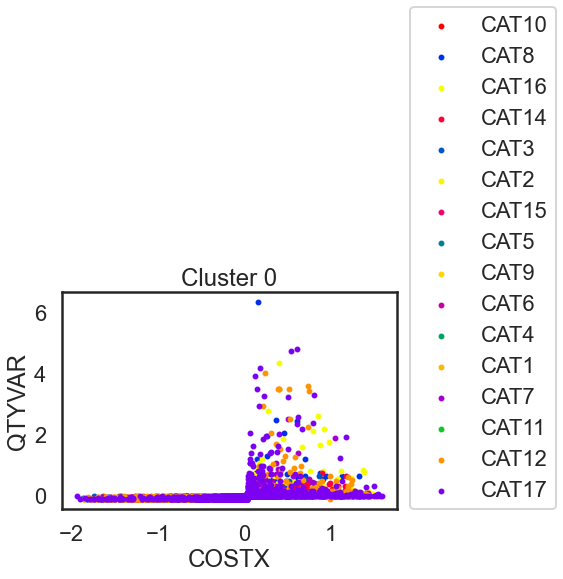

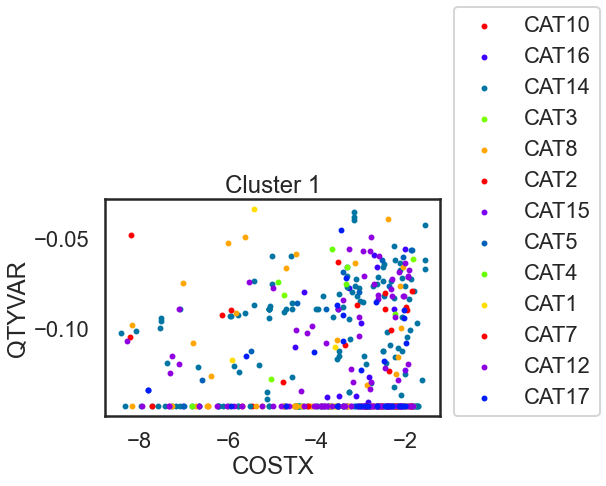

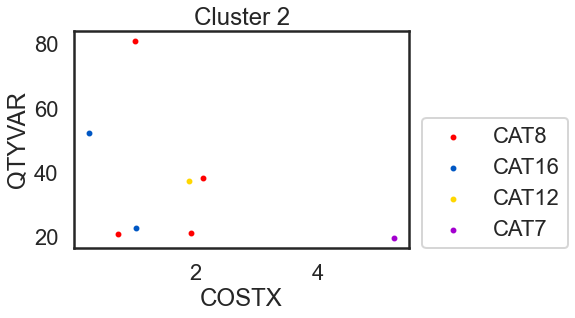

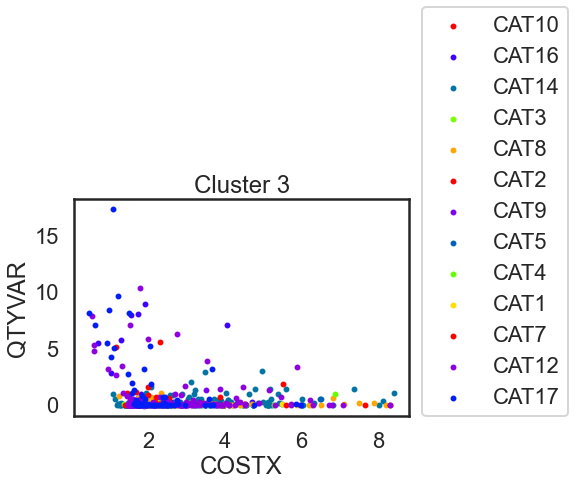

In [55]:
for cluster in np.unique(kprototype.labels_):
  plttitle = 'Cluster ' + cluster.astype(str)
  uniq = list(set(data1[data1['Cluster']==cluster].CAT))
  # Color map
  z = range(1,len(uniq))
  colorMap = plt.get_cmap('prism')
  cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
  scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=colorMap)
  # Plot CAT
  for i in range(len(uniq)):
    plt.scatter(data1[(data1['Cluster']==cluster) & ( data1['CAT']== uniq[i])].COSTX, data1[(data1['Cluster']==cluster) & ( data1['CAT']== uniq[i])].QTYVAR, s=15, color=scalarMap.to_rgba(i), label=uniq[i])
  plt.xlabel('COSTX')
  plt.ylabel('QTYVAR')
  plt.title(plttitle)
  plt.legend(loc=(1.04,0))
  plt.show()

In [59]:
for i in range(4):
    contingency = pd.crosstab(data1[data1['Cluster']==i].Cluster, data1[data1['Cluster']==i].CAT) 
    print(contingency)

CAT      CAT1  CAT10  CAT11  CAT12  CAT14  CAT15  CAT16  CAT17  CAT2  CAT3  \
Cluster                                                                      
0         134    235      1   2319   1729     82   2362   3895   185   479   

CAT      CAT4  CAT5  CAT6  CAT7  CAT8  CAT9  
Cluster                                      
0          94   176     7  1166  2120   159  
CAT      CAT1  CAT10  CAT12  CAT14  CAT15  CAT16  CAT17  CAT2  CAT3  CAT4  \
Cluster                                                                     
1           6      6     99    185      1     38     31     2    17     6   

CAT      CAT5  CAT7  CAT8  
Cluster                    
1          12    26    54  
CAT      CAT12  CAT16  CAT7  CAT8
Cluster                          
2            1      2     1     4
CAT      CAT1  CAT10  CAT12  CAT14  CAT16  CAT17  CAT2  CAT3  CAT4  CAT5  \
Cluster                                                                    
3           6     10    139    225     53     62     3   